RMSE: 0.90


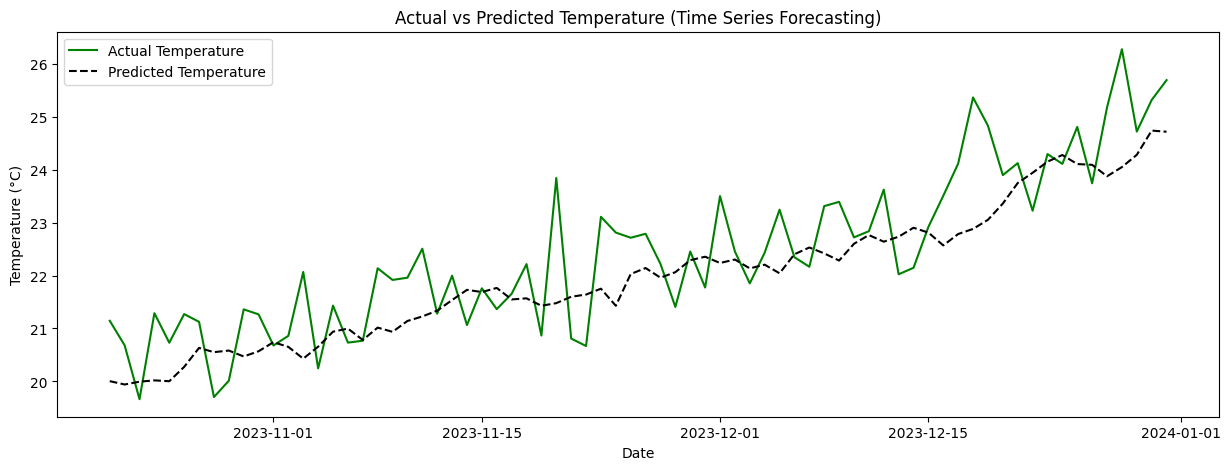

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic time-series temperature data
np.random.seed(42)
days = 365  # Number of days
date_range = pd.date_range(start='2023-01-01', periods=days, freq='D')

# Generate temperature data with a seasonal pattern + random noise
temperature = 25 + 5 * np.sin(np.linspace(0, 2 * np.pi, days)) + np.random.normal(0, 1, days)

# Create DataFrame
data = pd.DataFrame({'Date': date_range, 'Temperature': temperature})
data.set_index('Date', inplace=True)

# Create lag features (previous 7 days)
lag_days = 7
for i in range(1, lag_days + 1):
    data[f'Temperature_lag{i}'] = data['Temperature'].shift(i)

# Drop NaN values (first 7 rows will be NaN)
data.dropna(inplace=True)

# Prepare features and target variable
X = data[[f'Temperature_lag{i}' for i in range(1, lag_days + 1)]]
y = data['Temperature']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future temperatures
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Plot actual vs predicted temperatures
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label="Actual Temperature", color="green")
plt.plot(y_test.index, y_pred, label="Predicted Temperature", color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature (Time Series Forecasting)")
plt.legend()
plt.show()
